# **Proyek Analisis Data: Bike Sharing Dataset**

- **Nama:** Benny Danang Kurniawan
- **Email:** bennydanangkurniawan@gmail.com  
- **ID Dicoding:** bendakudaz

## **Menentukan Pertanyaan Bisnis**

- Bagaimana performa penyewaan sepeda pada tahun 2011 - 2012?

- Di musim apa yang paling banyak dan paling sedikit penyewaan sepeda?

- Di kondisi cuaca apa yang paling banyak dan paling sedikit penyewaan sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## **Data Wrangling**

### Gathering Data

In [10]:
df = pd.read_csv("Dashboard/main_data.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,0,"Mist + Cloudy, Mist + Broken Clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,"Mist + Cloudy, Mist + Broken Clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Insight

dataset yang diperlukan sukses diload. Beberapa dataset yang diload yaitu:

1. main_data.csv  

### Assessing Data

#### Menilai Data days_df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.5+ KB


In [12]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah Duplikasi: ", df.duplicated().sum())

Jumlah Duplikasi:  0


In [14]:
df.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Insight

| Dataframe | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value |
|---|---|---|---|---|
| days_df | Terdapat tipe data yang salah pada kolom dteday | - | - | - |

### Cleaning Data

##### Replace Type Data

In [15]:
df["dteday"] = pd.to_datetime(df["dteday"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## **Exploratory Data Analysis (EDA)**

### Eksplorasi Data days_df

In [17]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
df.groupby(by="season")["instant"].nunique().sort_values(ascending=False)

season
Fall        188
Summer      184
Springer    181
Winter      178
Name: instant, dtype: int64

In [19]:
df.groupby(by="weathersit")["instant"].nunique().sort_values(ascending=False)

weathersit
Clear, Few Clouds, Partly Cloudy, Partly Cloudy                                            463
Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist                               247
Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds     21
Name: instant, dtype: int64

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana Jumlah Order performa Pelayanan Persewaan Sepeda?

In [46]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "cnt": "sum"
})

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "cnt": "order_count"
    }, inplace=True)

monthly_df= monthly_df["order_count"].sum()
monthly_df


C:\Users\bento\AppData\Local\Temp\ipykernel_18616\610645013.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.int64(3292679)

2. Berapakah Jumlah Pada Casual ?

In [47]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "casual": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "casual": "casual_count"
    }, inplace=True)

monthly_df= monthly_df["casual_count"].sum()
monthly_df

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\1656795841.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.int64(620017)

3. Berapakah Jumlah Regitered? 

In [48]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "registered": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "registered": "registered_count"
    }, inplace=True)

monthly_df= monthly_df["registered_count"].sum()
monthly_df

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\410129083.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.int64(2672662)

4. Rata Rata Temp? 

In [43]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "temp": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "temp": "temp_count"
}, inplace=True)

total_windspeed = monthly_df["temp_count"].sum() /  monthly_df["temp_count"].count() 
total_windspeed

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\902213044.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.float64(15.088595016666668)

5. Rata - Rata Hum?

In [44]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "hum": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "hum": "hum_count"
}, inplace=True)

total_hum = monthly_df["hum_count"].sum() /  monthly_df["hum_count"].count() 
total_hum

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\3341340069.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.float64(19.124606666666665)

6. Rata Rata WindSpeed?

In [45]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "windspeed": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "windspeed": "windspeed_count"
}, inplace=True)

total_hum = monthly_df["windspeed_count"].sum() /  monthly_df["windspeed_count"].count() 
total_hum

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\3203794443.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


np.float64(5.801892529166667)

7. Berapa Order Perbulan? 

In [49]:
monthly_df = df.resample(rule='M', on='dteday').agg({
        "cnt": "sum"
    })

monthly_df.index = monthly_df.index.strftime('%b %Y')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
        "cnt": "order_count"
}, inplace=True)

monthly_df

C:\Users\bento\AppData\Local\Temp\ipykernel_18616\793453459.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(rule='M', on='dteday').agg({


,dteday,order_count
0,Jan 2011,38189
1,Feb 2011,48215
2,Mar 2011,64045
3,Apr 2011,94870
4,May 2011,135821
5,Jun 2011,143512
6,Jul 2011,141341
7,Aug 2011,136691
8,Sep 2011,127418
9,Oct 2011,123511


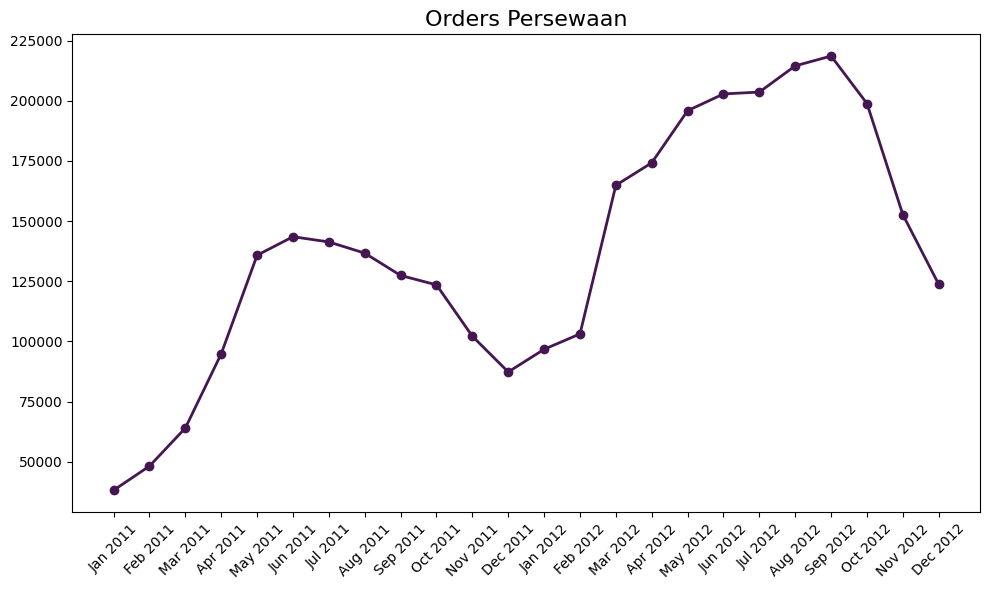

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(monthly_df['dteday'], monthly_df['order_count'], marker='o', linestyle='-', linewidth=2, color='#441752')

plt.title('Orders Persewaan', fontsize=16, loc='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
8. musim Paling Banyak dan sedikit ?

In [55]:
if df["season"].dtype != "object":
    df["season"] = df["season"].apply(lambda x: 
        "Springer" if x == 1 else
        "Summer" if x == 2 else
        "Fall" if x == 3 else 
        "Winter")

season = df.groupby("season")["instant"].nunique().sort_values(ascending=False).reset_index()
season.head()


,season,instant
0,Fall,188
1,Summer,184
2,Springer,181
3,Winter,178


C:\Users\bento\AppData\Local\Temp\ipykernel_18616\4065328360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\4065328360.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\4065328360.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\4065328360.py:24: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


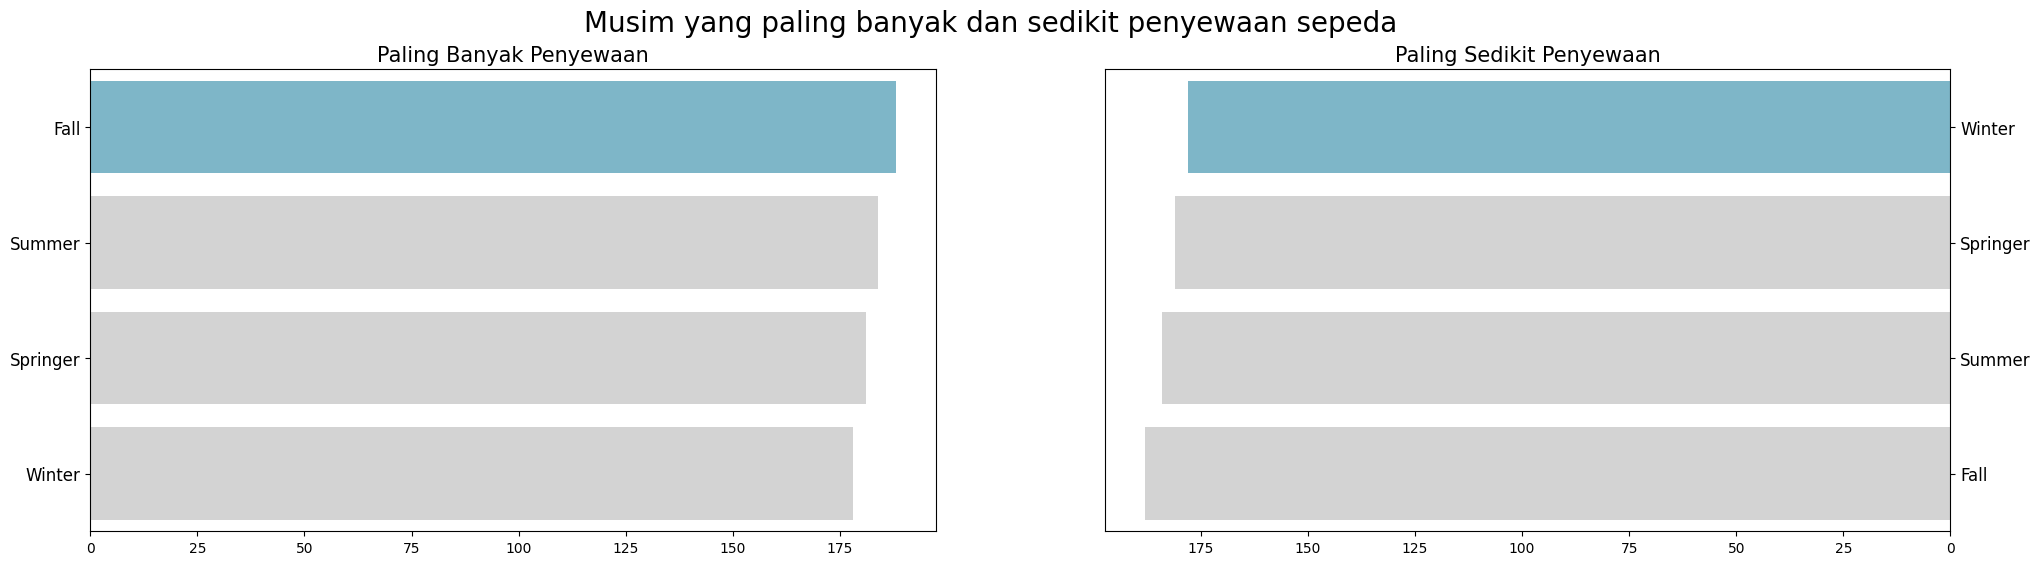

In [56]:
fig, ax = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(24, 6)
)
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    x="instant", 
    y="season", 
    data=season.head(5), 
    palette=colors, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title(
    "Paling Banyak Penyewaan", 
    loc="center", 
    fontsize=15
)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(
    x="instant", 
    y="season", 
    data=season.sort_values(
        by="instant", 
        ascending=True).head(5), 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title(
    "Paling Sedikit Penyewaan", 
    loc="center", 
    fontsize=15
)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Musim yang paling banyak dan sedikit penyewaan sepeda", fontsize=20)
plt.show()

9. Kondisi cuaca yang menyebabkan persewaan Sepeda?

In [57]:
if df["weathersit"].dtype != "object":
    df["weathersit"] = df["weathersit"].apply(lambda x: 
        "Clear, Few Clouds, Partly Cloudy, Partly Cloudy" if x == 1 else
        "Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist" if x == 2 else
        "Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds" if x == 3 else 
        "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")

weathersit = df.groupby("weathersit")["instant"].nunique().sort_values(ascending=False).reset_index()
weathersit.head()

,weathersit,instant
0,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",463
1,"Mist + Cloudy, Mist + Broken Clouds, Mist + Fe...",247
2,"Light Snow, Light Rain + Thunderstorm + Scatte...",21


C:\Users\bento\AppData\Local\Temp\ipykernel_18616\374863403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\374863403.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\374863403.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\bento\AppData\Local\Temp\ipykernel_18616\374863403.py:24: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


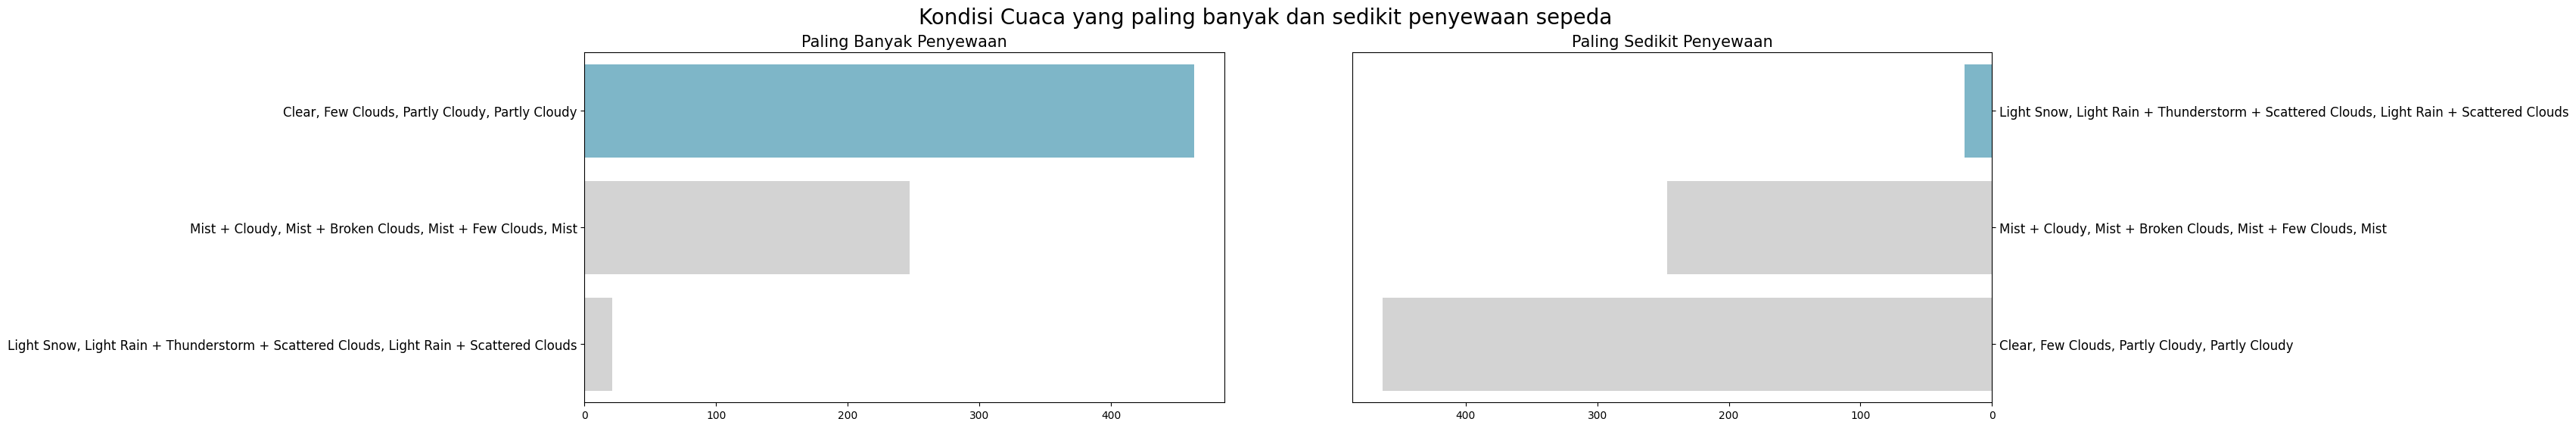

In [58]:
fig, ax = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(24, 6)
)
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    x="instant", 
    y="weathersit", 
    data=weathersit.head(5), 
    palette=colors, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title(
    "Paling Banyak Penyewaan", 
    loc="center", 
    fontsize=15
)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(
    x="instant", 
    y="weathersit", 
    data=weathersit.sort_values(
        by="instant", 
        ascending=True).head(5), 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title(
    "Paling Sedikit Penyewaan", 
    loc="center", 
    fontsize=15
)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Kondisi Cuaca yang paling banyak dan sedikit penyewaan sepeda", fontsize=20)
plt.show()

## **Export Data**

In [16]:
df.to_csv("Dashboard/main_data.csv", index=False)

## **Conclusion**

Dari Analysis yang telah dilakukan, ada beberapa kesimpulan yaitu:
1. Peningkatan **paling banyak** untuk penyewaan sepeda berada pada bulan **Febuari ke Maret Tahun 2022** dan untuk **penurunan paling drastis** pada bulan **Oktober ke November Tahun 2022**

2. Paling banyak menyewa sepeda pada **musim Fall**

3. Paling banyak yang menyewa sepeda pada **kondisi Clear, Few Clouds, Partly Cloudy, Partly Cloudy**